# Dictionaries and Pandas

## References: 

- [Datacamp - dictionaries](https://campus.datacamp.com/courses/intermediate-python/dictionaries-pandas?ex=1)


## Overview

Dictionary is an unordered collection of key-value pairs, where each key is unique. It is denoted by curly braces `{}` and the key-value pairs are separated by a `:` colon. Dictionaries are extremely useful when we need to store and retrieve data in a way that is fast and efficient.


## Creating a Dictionary

To create a dictionary in Python, we use the curly braces {} and separate the key-value pairs with a colon. Here's an example:


In [1]:
hot_data = {
    # keys        :   values 
    'dataset_name': 'Hawaii Ocean Time-series data',
    'dataset_description': 'HOT dataset',
    'dataset_source': 'BCO-DMO',
    'dataset_variables': ['temperature', 'salinity', 'pressure'], # not including everything
    'dataset_years': (1988, 2019),
    'dataset_ctd':'https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3937.csv',
    'dataset_bottle':'https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3773.csv'
}

In this example, we have created a dictionary called `hot_data` with several key-value pairs. The keys are strings (e.g. 'dataset_name') and the values can be of any data type (e.g. strings, lists, tuples, integers).


## Accessing Dictionary Values

You can access the value of a specific key in a dictionary by using the key inside square brackets `[]`. For example, to access the value for 'dataset_name' in `hot_data`, we would do the following:

In [2]:
print(hot_data['dataset_name'])

Hawaii Ocean Time-series data


## Updating a Dictionary

You can add new key-value pairs to a dictionary or update existing ones by assigning a value to a specific key. Here's an example of adding a new key-value pair to hot_data:

In [3]:
hot_data['dataset_processor'] = 'Fernando C. Pacheco'

In [4]:
print(hot_data)

{'dataset_name': 'Hawaii Ocean Time-series data', 'dataset_description': 'HOT dataset', 'dataset_source': 'BCO-DMO', 'dataset_variables': ['temperature', 'salinity', 'pressure'], 'dataset_years': (1988, 2019), 'dataset_ctd': 'https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3937.csv', 'dataset_bottle': 'https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3773.csv', 'dataset_processor': 'Fernando C. Pacheco'}


## Iterating over a Dictionary

You can iterate over a dictionary using a for loop. Here's an example of iterating over the `hot_data` dictionary we created earlier:



In [5]:
for key, value in hot_data.items():
    print(key, ':', value)

dataset_name : Hawaii Ocean Time-series data
dataset_description : HOT dataset
dataset_source : BCO-DMO
dataset_variables : ['temperature', 'salinity', 'pressure']
dataset_years : (1988, 2019)
dataset_ctd : https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3937.csv
dataset_bottle : https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3773.csv
dataset_processor : Fernando C. Pacheco


# Pandas

Pandas is a powerful Python library used for data manipulation and analysis. It provides a data structure called DataFrame, which allows you to organize and manipulate data in a tabular form.

## Importing Pandas and Loading Data

Before we start using Pandas, we need to install it and import it into our Python environment.

`conda install pandas`
     
    or 

`pip install pandas`

Next, we will load our data into a Pandas DataFrame. We will use the CTD (conductivity, temperature, depth) dataset from HOT. This dataset contains measurements of water temperature, salinity, and pressure at various depths in the ocean.

In [6]:
# DOWNLOAD DATASET
import urllib.request

# .csv generated from: https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3937.html
url = "https://erddap.bco-dmo.org/erddap/tabledap/bcodmo_dataset_3937.csv?cruise_name%2Cstation%2Ccast%2Ctime%2CYear%2CMonth%2CDay%2Ctimeutc%2Clongitude%2Clatitude%2Cdepth_max%2Cpres_max%2CDate%2Ctimecode%2CHOT_summary_file_name%2Cparameters%2Cnum_bottles%2Csection%2Cnav_code%2Cdepth_hgt%2CEXPOCODE%2CShip%2Ccomments%2CCTDPRS%2CCTDTMP%2CCTDSAL%2CCTDOXY%2CXMISS%2CCHLPIG%2CNUMBER%2CNITRATE%2CFLUOR%2CQUALT1"
file_name = "bcodmo_dataset_3937.csv"
urllib.request.urlretrieve(url, file_name)

import pandas as pd

#url = hot_data['dataset_ctd']
url= "bcodmo_dataset_3937.csv"

In [7]:
df = pd.read_csv(url , 
                 skiprows=[1],          # Remove the units header for an easier import 
                 dtype=None,
                 parse_dates=['time']   # Change object type to datetime
                )

/var/folders/wg/y4dhp2991vx8n8w3ckrv_2rw0000gn/T/ipykernel_47230/3393797374.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url ,


In [8]:
df

,cruise_name,station,cast,time,Year,Month,Day,timeutc,longitude,latitude,...,CTDPRS,CTDTMP,CTDSAL,CTDOXY,XMISS,CHLPIG,NUMBER,NITRATE,FLUOR,QUALT1
0,1,2,1,1988-10-30 21:34:00+00:00,1988,10,30,2134,-157.9967,22.7483,...,0.0,26.2412,35.2615,183.2,4.99,-0.0126,0.0,NaN,NaN,666666
1,1,2,1,1988-10-30 21:34:00+00:00,1988,10,30,2134,-157.9967,22.7483,...,2.0,26.2412,35.2615,183.2,4.99,-0.0126,36.0,NaN,NaN,222322
2,1,2,1,1988-10-30 21:34:00+00:00,1988,10,30,2134,-157.9967,22.7483,...,4.0,26.2554,35.2530,185.5,4.08,0.0026,72.0,NaN,NaN,223322
3,1,2,1,1988-10-30 21:34:00+00:00,1988,10,30,2134,-157.9967,22.7483,...,6.0,26.2377,35.2455,204.8,3.05,0.0167,108.0,NaN,NaN,222122
4,1,2,1,1988-10-30 21:34:00+00:00,1988,10,30,2134,-157.9967,22.7483,...,8.0,26.2257,35.2419,205.1,2.63,0.0043,96.0,NaN,NaN,222122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503261,288,50,1,2016-11-28 17:51:00+00:00,2016,11,28,1751,-157.9373,22.7703,...,194.0,18.2746,34.9098,203.9,NaN,0.0254,144.0,NaN,NaN,222192
3503262,288,50,1,2016-11-28 17:51:00+00:00,2016,11,28,1751,-157.9373,22.7703,...,196.0,18.1590,34.9027,203.8,NaN,0.0257,108.0,NaN,NaN,222192
3503263,288,50,1,2016-11-28 17:51:00+00:00,2016,11,28,1751,-157.9373,22.7703,...,198.0,17.9686,34.8727,203.8,NaN,0.0257,156.0,NaN,NaN,222192
3503264,288,50,1,2016-11-28 17:51:00+00:00,2016,11,28,1751,-157.9373,22.7703,...,200.0,17.8751,34.8506,201.8,NaN,0.0248,108.0,NaN,NaN,222192


In [9]:
df.dtypes

cruise_name                            int64
station                                int64
cast                                   int64
time                     datetime64[ns, UTC]
Year                                   int64
Month                                  int64
Day                                    int64
timeutc                                int64
longitude                            float64
latitude                             float64
depth_max                              int64
pres_max                               int64
Date                                   int64
timecode                              object
HOT_summary_file_name                 object
parameters                            object
num_bottles                            int64
section                               object
nav_code                              object
depth_hgt                              int64
EXPOCODE                              object
Ship                                  object
comments  

In [10]:
df = df.set_index('time')

In [11]:
df

,cruise_name,station,cast,Year,Month,Day,timeutc,longitude,latitude,depth_max,...,CTDPRS,CTDTMP,CTDSAL,CTDOXY,XMISS,CHLPIG,NUMBER,NITRATE,FLUOR,QUALT1
time,,,,,,,,,,,,,,,,,,,,,
1988-10-30 21:34:00+00:00,1,2,1,1988,10,30,2134,-157.9967,22.7483,4750,...,0.0,26.2412,35.2615,183.2,4.99,-0.0126,0.0,NaN,NaN,666666
1988-10-30 21:34:00+00:00,1,2,1,1988,10,30,2134,-157.9967,22.7483,4750,...,2.0,26.2412,35.2615,183.2,4.99,-0.0126,36.0,NaN,NaN,222322
1988-10-30 21:34:00+00:00,1,2,1,1988,10,30,2134,-157.9967,22.7483,4750,...,4.0,26.2554,35.2530,185.5,4.08,0.0026,72.0,NaN,NaN,223322
1988-10-30 21:34:00+00:00,1,2,1,1988,10,30,2134,-157.9967,22.7483,4750,...,6.0,26.2377,35.2455,204.8,3.05,0.0167,108.0,NaN,NaN,222122
1988-10-30 21:34:00+00:00,1,2,1,1988,10,30,2134,-157.9967,22.7483,4750,...,8.0,26.2257,35.2419,205.1,2.63,0.0043,96.0,NaN,NaN,222122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-28 17:51:00+00:00,288,50,1,2016,11,28,1751,-157.9373,22.7703,4705,...,194.0,18.2746,34.9098,203.9,NaN,0.0254,144.0,NaN,NaN,222192
2016-11-28 17:51:00+00:00,288,50,1,2016,11,28,1751,-157.9373,22.7703,4705,...,196.0,18.1590,34.9027,203.8,NaN,0.0257,108.0,NaN,NaN,222192
2016-11-28 17:51:00+00:00,288,50,1,2016,11,28,1751,-157.9373,22.7703,4705,...,198.0,17.9686,34.8727,203.8,NaN,0.0257,156.0,NaN,NaN,222192


In [12]:
# Print out cruise_names column as Pandas Series
print(df['cruise_name'])

time
1988-10-30 21:34:00+00:00      1
1988-10-30 21:34:00+00:00      1
1988-10-30 21:34:00+00:00      1
1988-10-30 21:34:00+00:00      1
1988-10-30 21:34:00+00:00      1
                            ... 
2016-11-28 17:51:00+00:00    288
2016-11-28 17:51:00+00:00    288
2016-11-28 17:51:00+00:00    288
2016-11-28 17:51:00+00:00    288
2016-11-28 17:51:00+00:00    288
Name: cruise_name, Length: 3503266, dtype: int64


In [13]:
# Print out cruise_names column as Pandas DataFrame
print(df[['cruise_name']])

                           cruise_name
time                                  
1988-10-30 21:34:00+00:00            1
1988-10-30 21:34:00+00:00            1
1988-10-30 21:34:00+00:00            1
1988-10-30 21:34:00+00:00            1
1988-10-30 21:34:00+00:00            1
...                                ...
2016-11-28 17:51:00+00:00          288
2016-11-28 17:51:00+00:00          288
2016-11-28 17:51:00+00:00          288
2016-11-28 17:51:00+00:00          288
2016-11-28 17:51:00+00:00          288

[3503266 rows x 1 columns]


In [14]:
# Print out DataFrame with pressure and temperature  columns
print(df[['CTDPRS','CTDTMP']])

                           CTDPRS   CTDTMP
time                                      
1988-10-30 21:34:00+00:00     0.0  26.2412
1988-10-30 21:34:00+00:00     2.0  26.2412
1988-10-30 21:34:00+00:00     4.0  26.2554
1988-10-30 21:34:00+00:00     6.0  26.2377
1988-10-30 21:34:00+00:00     8.0  26.2257
...                           ...      ...
2016-11-28 17:51:00+00:00   194.0  18.2746
2016-11-28 17:51:00+00:00   196.0  18.1590
2016-11-28 17:51:00+00:00   198.0  17.9686
2016-11-28 17:51:00+00:00   200.0  17.8751
2016-11-28 17:51:00+00:00   202.0  17.7435

[3503266 rows x 2 columns]


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3503266 entries, 1988-10-30 21:34:00+00:00 to 2016-11-28 17:51:00+00:00
Data columns (total 32 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   cruise_name            int64  
 1   station                int64  
 2   cast                   int64  
 3   Year                   int64  
 4   Month                  int64  
 5   Day                    int64  
 6   timeutc                int64  
 7   longitude              float64
 8   latitude               float64
 9   depth_max              int64  
 10  pres_max               int64  
 11  Date                   int64  
 12  timecode               object 
 13  HOT_summary_file_name  object 
 14  parameters             object 
 15  num_bottles            int64  
 16  section                object 
 17  nav_code               object 
 18  depth_hgt              int64  
 19  EXPOCODE               object 
 20  Ship                   object 
 21  comments 

## LOC and ILOC

In Python's pandas library, `loc` and `iloc` are important functions for data indexing and selection. They allow you to access and manipulate specific rows and columns in a DataFrame or Series. Here's an explanation of both functions and some examples:


###  loc 
- loc is used to access rows and columns by label.
- The syntax is `df.loc[row_indexer, column_indexer]`, where row_indexer and column_indexer can be a single label, a list of labels, or a slice.
- The labels can be either row labels or column labels.
- It returns a new DataFrame or Series containing the selected rows and columns.

In [16]:
print(df.loc[:,'CTDPRS'])

time
1988-10-30 21:34:00+00:00      0.0
1988-10-30 21:34:00+00:00      2.0
1988-10-30 21:34:00+00:00      4.0
1988-10-30 21:34:00+00:00      6.0
1988-10-30 21:34:00+00:00      8.0
                             ...  
2016-11-28 17:51:00+00:00    194.0
2016-11-28 17:51:00+00:00    196.0
2016-11-28 17:51:00+00:00    198.0
2016-11-28 17:51:00+00:00    200.0
2016-11-28 17:51:00+00:00    202.0
Name: CTDPRS, Length: 3503266, dtype: float64


### iloc

- iloc is used to access rows and columns by integer-based position.
- The syntax is df.iloc[row_indexer, column_indexer], where row_indexer and column_indexer can be a single - integer, a list of integers, or a slice.
- The integers represent the positional index of the rows or columns.
- It returns a new DataFrame or Series containing the selected rows and columns.

In [17]:
print(df.iloc[:,23])

time
1988-10-30 21:34:00+00:00    26.2412
1988-10-30 21:34:00+00:00    26.2412
1988-10-30 21:34:00+00:00    26.2554
1988-10-30 21:34:00+00:00    26.2377
1988-10-30 21:34:00+00:00    26.2257
                              ...   
2016-11-28 17:51:00+00:00    18.2746
2016-11-28 17:51:00+00:00    18.1590
2016-11-28 17:51:00+00:00    17.9686
2016-11-28 17:51:00+00:00    17.8751
2016-11-28 17:51:00+00:00    17.7435
Name: CTDTMP, Length: 3503266, dtype: float64


In [18]:
#df.isnull().sum()
#df['CTDPRS'] = -df['CTDPRS']     # convert pressure to negative 

# Filtering pandas DataFrames


In [19]:
# Import numpy as np
import numpy as np
# To use matlplotlib in your python script, import pyplot
import matplotlib.pyplot as plt

In [20]:
# Convert positive pressure to negative
df['CTDPRS'] = -df['CTDPRS'] 

In [21]:
# Filter the top 100 dbar
%timeit pressure_100=df[np.logical_and(df['CTDPRS'] <= 0, df['CTDPRS'] >= -100)]

74.1 ms ± 3.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [24]:
pressure_100=df[np.logical_and(df['CTDPRS'] <= 0, df['CTDPRS'] >= -100)]

In [22]:
# If you want to do the same without numpy
%timeit pressure_100 = df[ (df['CTDPRS'] <= 0) & (df['CTDPRS'] >= -100)]

72.6 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


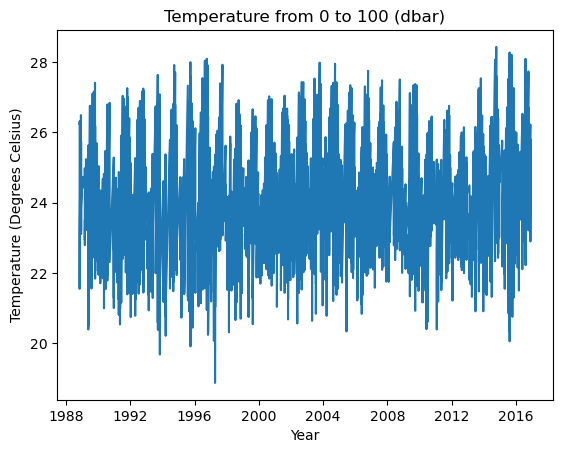

In [25]:
# TEMPERATURE
# Create figure
fig, ax = plt.subplots()
ax.plot(pressure_100['CTDTMP'])

#Add labels and a title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (Degrees Celsius)')
ax.set_title('Temperature from 0 to 100 (dbar)')


plt.show()

In [26]:
# Filter the bottom 
pressure_bottom=df[np.logical_and(df['CTDPRS'] <= -4750, df['CTDPRS'] >= -4950)]

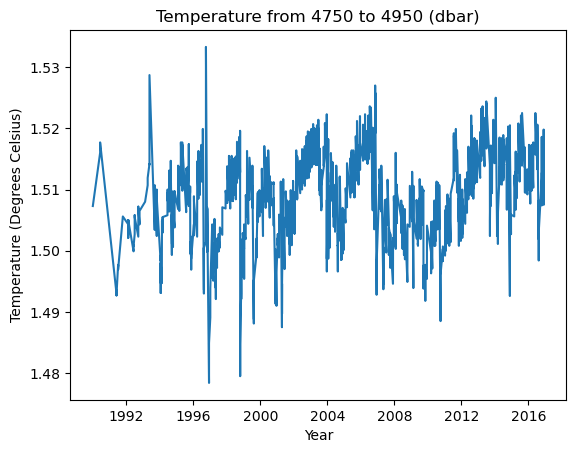

In [27]:
# TEMPERATURE
# Create figure
fig, ax = plt.subplots()
ax.plot(pressure_bottom['CTDTMP'])

#Add labels and a title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (Degrees Celsius)')
ax.set_title('Temperature from 4750 to 4950 (dbar)')


plt.show()

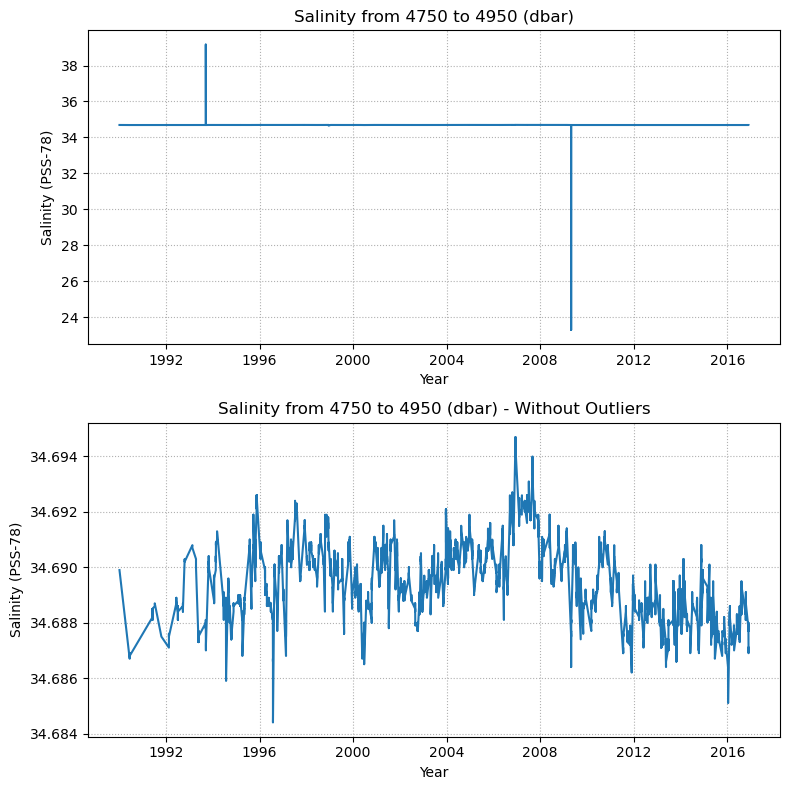

In [28]:
# SALINITY
# Filter the bottom
pressure_bottom = df[(df['CTDPRS'] <= -4750) & (df['CTDPRS'] >= -4950)]

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))

# Plot CTDSAL for unfiltered data
axs[0].plot(pressure_bottom['CTDSAL'])
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Salinity (PSS-78)')
axs[0].set_title('Salinity from 4750 to 4950 (dbar)')
axs[0].grid(True, linestyle='dotted')  # Add grid with dotted linestyle


# Quick filter the bottom data without salinity outliers/questionable values.
pressure_bottom_outliers = df[(df['CTDPRS'] <= -4750) & (df['CTDPRS'] >= -4950) &
                              (df['CTDSAL'] >= 34.66) & (df['CTDSAL'] <= 36)] 

# Plot CTDSAL for filtered data
axs[1].plot(pressure_bottom_outliers['CTDSAL'])
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Salinity (PSS-78)')
axs[1].set_title('Salinity from 4750 to 4950 (dbar) - Without Outliers')
axs[1].grid(True, linestyle='dotted')  # Add grid with dotted linestyle


# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

In [29]:
# Find the bad cruises
pressure_bottom[(pressure_bottom['CTDSAL']>39) | (pressure_bottom['CTDSAL'] < 26)]

,cruise_name,station,cast,Year,Month,Day,timeutc,longitude,latitude,depth_max,...,CTDPRS,CTDTMP,CTDSAL,CTDOXY,XMISS,CHLPIG,NUMBER,NITRATE,FLUOR,QUALT1
time,,,,,,,,,,,,,,,,,,,,,
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4792.0,1.5062,39.1634,152.3,NaN,-9.0000,60.0,NaN,NaN,233395
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4794.0,1.5064,39.1436,151.3,NaN,-9.0000,48.0,NaN,NaN,233395
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4796.0,1.5066,39.1275,151.1,NaN,-9.0000,60.0,NaN,NaN,233395
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4798.0,1.5069,39.1186,151.5,NaN,-9.0000,48.0,NaN,NaN,233395
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4800.0,1.5071,39.1347,148.9,NaN,-9.0000,144.0,NaN,NaN,233395
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4802.0,1.5074,39.1373,148.3,NaN,-9.0000,60.0,NaN,NaN,233395
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4804.0,1.5076,39.1299,148.4,NaN,-9.0000,120.0,NaN,NaN,233395
1993-09-13 11:36:00+00:00,49,2,1,1993,9,13,1136,-158.0002,22.7497,4750,...,-4806.0,1.5078,39.1217,147.8,NaN,-9.0000,24.0,NaN,NaN,233395
2009-04-28 14:54:00+00:00,210,2,3,2009,4,28,1454,-158.0000,22.7500,4727,...,-4760.0,1.5026,23.2799,167.1,NaN,0.0308,108.0,NaN,NaN,244492



- `HOT-49 S2C1`  had some `questionable` Salinity data from -4782 to -4802 dbar.
- `HOT-210 S2C3` displayed a `bad` Salinity data at -4760 dbar.

-  Another approch to filter the dataset would be to use that `['QUALT1']` column.


- Quality (defined by investigator); The quality word is the left-to-right concatenation of required quality bytes for the variables measured. They are defined as follows:

```
1 = Not calibrated with water samples;
2 = Acceptable measurement;
3 = Questionable measurement;
4 = Bad measurement;
5 = Not reported;
6 = Interpolated value;
7 = Not assigned for CTD data;
8 = Not assigned for CTD data;
9 = Not sampled";
    String long_name "QUALT1";
    String units "unitless";
```


In [30]:
# Filter the dataset again using `'QUALT1'`
df[df['QUALT1'].astype(str).str[2] == '2']['CTDSAL']

time
1988-10-30 21:34:00+00:00    35.2615
1988-10-30 21:34:00+00:00    35.2455
1988-10-30 21:34:00+00:00    35.2419
1988-10-30 21:34:00+00:00    35.2401
1988-10-30 21:34:00+00:00    35.2393
                              ...   
2016-11-28 17:51:00+00:00    34.9098
2016-11-28 17:51:00+00:00    34.9027
2016-11-28 17:51:00+00:00    34.8727
2016-11-28 17:51:00+00:00    34.8506
2016-11-28 17:51:00+00:00    34.8246
Name: CTDSAL, Length: 3464798, dtype: float64

- Let's break down the code step by step:

1. `df['QUALT1'].astype(str)` converts the `QUALT1` column to a string data type, allowing us to perform string operations on its values.
2. `.str[2]` accesses the third character of each value in the `QUALT1` column (Which represents the salinity in this case). Since the column values were converted to strings, we can use string indexing to extract the third character.
3. `== '2'` checks if the third character of each value in the `QUALT1` column is equal to '2'. This creates a boolean Series, where True indicates that the condition is satisfied and False otherwise. '2' means good data.
4. `df[df['QUALT1'].astype(str).str[2] == '2']` filters the DataFrame `df` based on the condition. It selects only the rows where the third character of the `QUALT1` column is '2'.
5. `['CTDSAL']` selects the `CTDSAL` column from the filtered DataFrame. It retrieves the values of the `CTDSAL` column for the rows that satisfy the condition.

So, the final result is a Series containing the values from the `CTDSAL` column, but only for the rows where the third character of the `QUALT1` column is '2' (good).

In [131]:
# Filter data using boolean condition 
pressure_bottom1 = df[(df['CTDPRS'] <= -4750) & (df['CTDPRS'] >= -4950) &
                      (df['CTDSAL'] >= 34.66) & (df['CTDSAL'] <= 36)]    # FILTER USING boolean

# Filter using 'QUALT1' column
pressure_bottom2 = df[(df['CTDPRS'] <= -4750) & (df['CTDPRS'] >= -4950) & 
                      (df['QUALT1'].astype(str).str[2] == '2')]   # FILTER USING FLAGS from ['QUALT1'] column
                                                                  # str[2] = 3rd character = salinity data
                                                                  # '2'    = good data only!
    
# Create a single plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot CTDSAL using the first method
ax.plot(pressure_bottom1['CTDSAL'], color='#0077be', linestyle='-', linewidth=1, label='Salinity (using a range)')

# Plot CTDSAL using flags
ax.plot(pressure_bottom2['CTDSAL'], color='#ed1c24' ,linestyle=':', linewidth=1,label='Salinity (using flag)')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Salinity (PSS-78)', fontsize=12)
ax.set_title('Salinity between 1.15 and 1.25 C', fontsize=14)
ax.grid(True, linestyle='dotted')

ax.legend(loc='upper right', fontsize=10)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


KeyError: 'CTDMP'

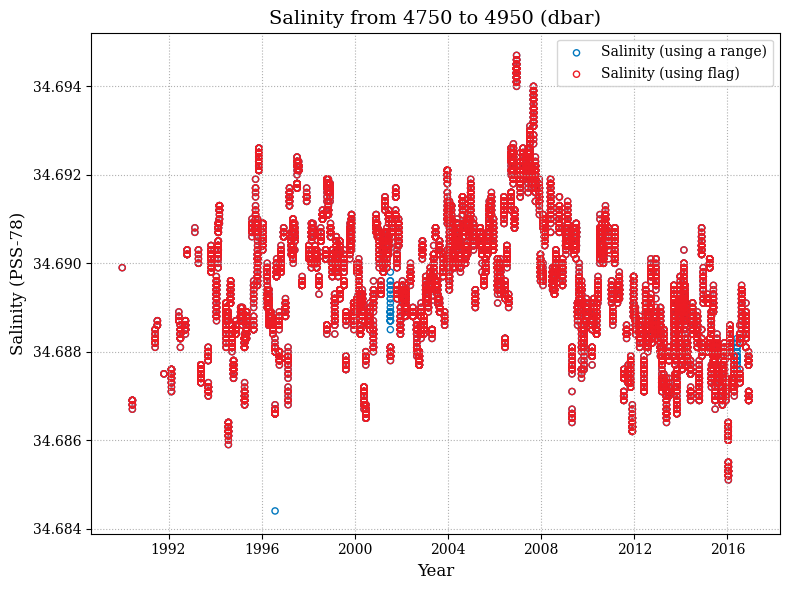

In [126]:
# Create a single plot
fig, ax = plt.subplots(figsize=(8, 6))

# Scatter plot of CTDSAL using the first method
ax.scatter(pressure_bottom1.index, pressure_bottom1['CTDSAL'], color='#0077be', marker='o', facecolor='none', s=20, label='Salinity (using a range)')

# Scatter plot of CTDSAL using flags
ax.scatter(pressure_bottom2.index, pressure_bottom2['CTDSAL'], color='#ed1c24', marker='o', facecolor='none', s=20, label='Salinity (using flag)')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Salinity (PSS-78)', fontsize=12)
ax.set_title('Salinity from 4750 to 4950 (dbar)', fontsize=14)
ax.grid(True, linestyle='dotted')

ax.legend(loc='upper right', fontsize=10)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()
